## Algorithmic Optimizer

In this project we will show the optimization of a strategy with the help of machine learning an we will se how to increase the performance & profitablity

In [5]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
%matplotlib inline
from nsepy import get_history
from datetime import date

In [6]:
df=pd.read_csv('BNF_15_19_5min.csv')

In [7]:
#df=pd.read_csv('BNF_15_19_5min.csv')
#style.use('ggplot')
i=75
trade=0

#stoploss
#data_preprocessing    
prevday_high=(df.loc[:,"high"][0:75]).max()


#df['day_open']=""
#df['day_close']=""
i=75
a=[]
b=[]
day_open=df.loc[:,"open"][0]
day_close=df.loc[:,"close"][74]



for i in range(75):
    a.append(day_open)
    b.append(day_close)
while i<(len(df)-75):
    
    day=df.loc[:,"Date"][i]
    cdh=df.loc[:,"high"][i]
    day_open=df.loc[:,"open"][i]
    day_close=df.loc[:,"close"][i+74]
    #print(tsl)
    while day==df.loc[:,"Date"][i]:
        a.append(day_open)
        b.append(day_close)
        #df.loc[:,'day_open'][i]=day_open
        #df.loc[:,'day_close'][i]=day_close
                
        if df.loc[:,"high"][i]>cdh:
            cdh=df.loc[:,"high"][i]
            
        i=i+1
        #print(i)
        #print(tsl)
    prevday_high=cdh


#print(df.head(75))
#print(len(df),)

df=df[0:len(df)-74]
df['day_open']=a
df['day_close']=b
#print(len(df)-len(a))



time_string=df['Time'].unique()
time_num=np.arange(99)
print(len(time_string),len(time_num))

df['Time'] = df['Time'].replace(to_replace = time_string, value = time_num) 

del df['volume']
print(df)
df=df.set_index('Date')

O=df['open']
H=df['high']
L=df['low']
C=df['close']


99 99
             Date  Time      open      high       low     close  day_open  \
0      09-01-2015     0  18845.90  18864.00  18790.20  18849.25   18845.9   
1      09-01-2015     1  18849.25  18859.65  18829.80  18847.00   18845.9   
2      09-01-2015     2  18847.00  18850.15  18799.40  18815.15   18845.9   
3      09-01-2015     3  18815.15  18821.40  18772.90  18810.70   18845.9   
4      09-01-2015     4  18810.70  18811.95  18788.55  18800.05   18845.9   
...           ...   ...       ...       ...       ...       ...       ...   
91313  23-12-2019    71  32326.65  32364.85  32326.65  32347.95   32381.0   
91314  23-12-2019    72  32346.15  32372.80  32341.95  32369.10   32381.0   
91315  23-12-2019    73  32367.00  32372.45  32350.65  32352.85   32381.0   
91316  23-12-2019    74  32353.70  32360.50  32328.30  32336.30   32381.0   
91317  24-12-2019     0  32337.80  32370.15  32289.50  32353.75   32381.0   

       day_close  
0       18598.05  
1       18598.05  
2       1859

In [8]:

#df['RSI'] = ta.RSI( C, timeperiod=14)


#df['SMA_10']=C.rolling(10).mean()
#df['SMA_21']=C.rolling(21).mean()
df['SMA_3']=C.rolling(215).mean()
#df['SMA_50']=C.rolling(50).mean()

df['CO']=((df['close']-df['day_open'])/df['day_open'])*100

df['HO']=((df['high']-df['day_open'])/df['day_open'])*100

df['LO']=((df['low']-df['day_open'])/df['day_open'])*100


#df['exp_10'] = C.ewm(span=10, adjust=False).mean()
#df['exp_21'] = C.ewm(span=21, adjust=False).mean()


#Average True Range
#df['ATR']=ta.ATR(H,L,C,timeperiod=14)




#Commodiy Channel Index 
#df['CCI']=ta.CCI(H,L,C,timeperiod=14)


#Momentum
#df['MOM']=ta.MOM(C,timeperiod=10)



#macd, macdsignal, macdhist = ta.MACD(C, fastperiod=12, slowperiod=26, signalperiod=9)
#df['MACD']=macd


#ROC
#df['ROC']=ta.ROC(C,timeperiod=10)


#ROCP
#df['ROCR']=ta.ROCP(C,timeperiod=10)



#Williams %R

#df['Williams %R']=ta.WILLR(H,L,C,timeperiod=14)


#Stochastic %K




In [9]:
df=df.dropna()
#df.head()


#For Converting into a Binary Classification Problem we will assign them into 1 or 0 values
df['pred_price']=np.where(df['day_close']>df['day_open'],1,0)

df=df.dropna()

#df=df.reset_index()

A=df['pred_price'].unique()




In [10]:

y=df['pred_price']

x=df.drop(columns=['pred_price'])



#define train/test split ratio
split_ratio=0.9


train_x=x[0:int(split_ratio*len(x))]
test_x=x[int(split_ratio*len(x)):(len(x))]



print('Observations: %d' % (len(x)))
print('Train Dataset:',train_x.shape)
print('Test Dataset:',test_x.shape)


print('----------------------------')


train_y=y[0:int(split_ratio*len(y))]
test_y=y[int(split_ratio*len(y)):(len(y))]



    
print('Observations: %d' % (len(y)))
print('Train Dataset:',train_y.shape)
print('Test Dataset:',test_y.shape)


Observations: 91104
Train Dataset: (81993, 11)
Test Dataset: (9111, 11)
----------------------------
Observations: 91104
Train Dataset: (81993,)
Test Dataset: (9111,)


In [11]:
"""
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

df=df.set_index('Date')
y=df['pred_price']
x=df.drop(columns=['pred_price'])
print(len(x))
print(x.head())

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

print(len(train_x),len(test_x))
"""


"\nfrom sklearn.model_selection import train_test_split \nfrom sklearn.linear_model import LinearRegression\nfrom sklearn import metrics\n%matplotlib inline\n\ndf=df.set_index('Date')\ny=df['pred_price']\nx=df.drop(columns=['pred_price'])\nprint(len(x))\nprint(x.head())\n\ntrain_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)\n\nprint(len(train_x),len(test_x))\n"

In [12]:
"""
from sklearn.ensemble import RandomForestClassifier

#train_x=train_x.set_index('Date')
classifier=RandomForestClassifier(n_estimators=100,n_jobs=2,random_state=0)
classifier.fit(train_x,train_y)






import sklearn
#test_x=test_x.set_index('Date')
predictions=classifier.predict(test_x)
print('accuracy:',sklearn.metrics.accuracy_score(test_y,predictions))
print("confusion matrix:",sklearn.metrics.confusion_matrix(test_y,predictions))
print("classification report:",sklearn.metrics.classification_report(test_y,predictions))
print(predictions)
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\n\n#train_x=train_x.set_index(\'Date\')\nclassifier=RandomForestClassifier(n_estimators=100,n_jobs=2,random_state=0)\nclassifier.fit(train_x,train_y)\n\n\n\n\n\n\nimport sklearn\n#test_x=test_x.set_index(\'Date\')\npredictions=classifier.predict(test_x)\nprint(\'accuracy:\',sklearn.metrics.accuracy_score(test_y,predictions))\nprint("confusion matrix:",sklearn.metrics.confusion_matrix(test_y,predictions))\nprint("classification report:",sklearn.metrics.classification_report(test_y,predictions))\nprint(predictions)\n'

In [13]:
import sklearn
from sklearn import tree

clf=tree.DecisionTreeClassifier(max_depth=5,random_state=0)


clf=clf.fit(train_x,train_y)

#del test_x['prediction']

predictions=clf.predict(test_x)
print('accuracy:',sklearn.metrics.accuracy_score(test_y,predictions))
print("confusion matrix:",sklearn.metrics.confusion_matrix(test_y,predictions))
print("classification report:",sklearn.metrics.classification_report(test_y,predictions))
print(predictions)


accuracy: 0.7745582263198332
confusion matrix: [[3646 1330]
 [ 724 3411]]
classification report:               precision    recall  f1-score   support

           0       0.83      0.73      0.78      4976
           1       0.72      0.82      0.77      4135

    accuracy                           0.77      9111
   macro avg       0.78      0.78      0.77      9111
weighted avg       0.78      0.77      0.77      9111

[1 1 1 ... 0 0 0]


[Text(418.5, 498.3, 'X[8] <= -0.026\ngini = 0.499\nsamples = 81993\nvalue = [42394, 39599]'),
 Text(209.25, 407.70000000000005, 'X[9] <= -0.249\ngini = 0.33\nsamples = 42132\nvalue = [33343, 8789]'),
 Text(104.625, 317.1, 'X[0] <= 46.5\ngini = 0.192\nsamples = 25543\nvalue = [22790, 2753]'),
 Text(52.3125, 226.5, 'X[9] <= -0.461\ngini = 0.258\nsamples = 15089\nvalue = [12798, 2291]'),
 Text(26.15625, 135.89999999999998, 'X[7] <= 14983.383\ngini = 0.187\nsamples = 8754\nvalue = [7840, 914]'),
 Text(13.078125, 45.299999999999955, 'gini = 0.475\nsamples = 281\nvalue = [172, 109]'),
 Text(39.234375, 45.299999999999955, 'gini = 0.172\nsamples = 8473\nvalue = [7668, 805]'),
 Text(78.46875, 135.89999999999998, 'X[7] <= 17049.191\ngini = 0.34\nsamples = 6335\nvalue = [4958, 1377]'),
 Text(65.390625, 45.299999999999955, 'gini = 0.488\nsamples = 728\nvalue = [421, 307]'),
 Text(91.546875, 45.299999999999955, 'gini = 0.309\nsamples = 5607\nvalue = [4537, 1070]'),
 Text(156.9375, 226.5, 'X[9] <= -

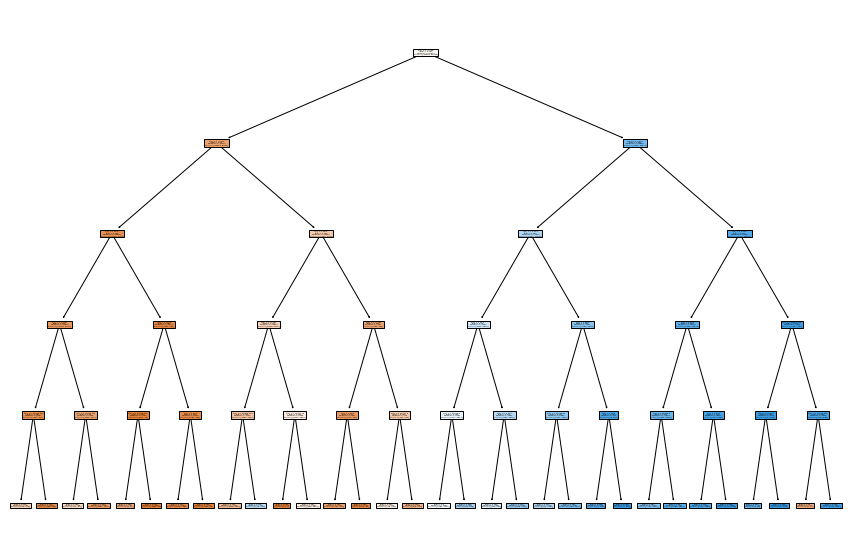

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [15]:
print(tree.export_text(clf))
clf.feature_importances_


|--- feature_8 <= -0.03
|   |--- feature_9 <= -0.25
|   |   |--- feature_0 <= 46.50
|   |   |   |--- feature_9 <= -0.46
|   |   |   |   |--- feature_7 <= 14983.38
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  14983.38
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  -0.46
|   |   |   |   |--- feature_7 <= 17049.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  17049.19
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  46.50
|   |   |   |--- feature_9 <= -0.65
|   |   |   |   |--- feature_5 <= 14269.27
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  14269.27
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  -0.65
|   |   |   |   |--- feature_0 <= 63.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  63.50
|   |   |   |   |   |--- class: 0
|   |--- feature_9 >  -0.25
|   |   |--- feature_0 <= 58.50
|   |   |   |--- feature_8 <= -0.15
|   |   |   |   |--- feature_6 <= 

array([3.13689506e-02, 6.99289699e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.03921277e-03, 1.44819754e-02, 6.74696054e-03,
       7.92468475e-01, 8.36164411e-02, 6.95786954e-02])

In [16]:
train_x

,Time,open,high,low,close,day_open,day_close,SMA_3,CO,HO,LO
Date,,,,,,,,,,,
13-01-2015,64,18723.20,18743.95,18711.95,18731.15,18889.00,18724.75,18741.691860,-0.835672,-0.767907,-0.937318
13-01-2015,65,18731.15,18732.45,18650.75,18666.95,18889.00,18724.75,18740.843953,-1.175552,-0.828789,-1.261316
13-01-2015,66,18666.95,18688.90,18642.80,18661.35,18889.00,18724.75,18739.980465,-1.205199,-1.059347,-1.303404
13-01-2015,67,18666.70,18689.55,18659.90,18674.70,18889.00,18724.75,18739.327209,-1.134523,-1.055906,-1.212875
13-01-2015,68,18674.70,18690.30,18664.30,18679.25,18889.00,18724.75,18738.715814,-1.110435,-1.051935,-1.189581
...,...,...,...,...,...,...,...,...,...,...,...
24-06-2019,45,30687.55,30692.10,30663.75,30670.70,30680.95,30616.80,30597.180698,-0.033408,0.036342,-0.056061
24-06-2019,46,30671.65,30689.55,30648.45,30674.90,30680.95,30616.80,30598.289302,-0.019719,0.028030,-0.105929
24-06-2019,47,30677.80,30685.50,30647.00,30659.65,30680.95,30616.80,30599.410000,-0.069424,0.014830,-0.110655


In [17]:
test_x['prediction']=predictions

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
test_x


df2=test_x

df3=train_x
df3=df3.reset_index()


predictions_train=clf.predict(train_x)

df3['prediction']=predictions_train

df2=df2.reset_index()

#print(df2.head())
#for i in range(test_x):

13-01-2015 14-01-2015 14-01-2015
     Entry_date Entry_time   Exit_date Exit_time  Buy_price  Sell_price  \
0    15-01-2015         66  15-01-2015        73   19315.55    19142.40   
1    20-01-2015          3  20-01-2015        41   19505.45    19612.50   
2    21-01-2015          4  21-01-2015        19   19956.50    19889.15   
3    23-01-2015          3  23-01-2015        11   20161.60    20083.15   
4    27-01-2015          8  27-01-2015        60   20190.65    20321.35   
..          ...        ...         ...       ...        ...         ...   
229  17-05-2019         25  17-05-2019        35   29018.75    29129.30   
230  20-05-2019          7  20-05-2019        10   30235.90    30338.20   
231  23-05-2019          6  23-05-2019         7   31276.45    31383.60   
232  27-05-2019         25  27-05-2019        42   31446.85    31572.55   
233  31-05-2019         10  31-05-2019        12   31768.95    31711.55   

        Pnl  Capital_Value  Stoploss    Reason  
0   -173.15      

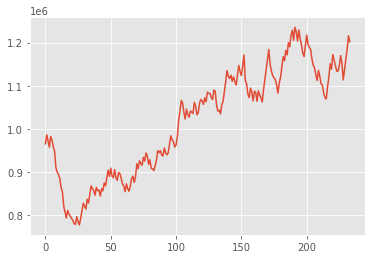

In [19]:



#df_new=df_new.reset_index()






from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import pandas as pd

# %matplotlib notebook
style.use('ggplot')
i = 75
trade = 0

capital = 1000000
lot_size = 1

pnl = 0
entry_date = 0
exit_date = 0
exit_time = 0
buy_price = 0
sell_price = 0

trade_log_dict = {"Entry_date": 0, "Entry_time": 0, "Exit_date": 0, "Exit_time": 0, "Buy_price": 0, "Sell_price": 0,"Pnl": 0, "Capital_Value": 0, "Stoploss": 0, "Reason": 0}

df_tradelog = pd.DataFrame(columns=["Entry_date", "Entry_time", "Exit_date", "Exit_time", "Buy_price", "Sell_price", "Pnl", "Capital_Value"
        , "Stoploss", "Reason"])

sc = 1000000
risk = 0.02
capital=1000000
no_of_shares = (risk * sc) / 100

tsl = 50
ns = []

enter = 0
a = 30000
#df = pd.read_csv('BNF_15_19_5min.csv')

df=df3


prevday_high = (df.loc[:, "high"][0:75]).max()
prevday_low = (df.loc[:, "low"][0:75]).min()
prevday_open = (df.loc[:, "open"][0])
prevday_close = (df.loc[:, "close"][74])

print(df.loc[:, "Date"][0], df.loc[:, "Date"][74], df.loc[:, "Date"][75])

first_5minhigh = 0
opening_candle_low = 0
potential_trade = 0

buy_price = 0
entry_time = 0
sl1 = 0
sl2 = 0
b = 300000

i = 75
while i < (len(df) - 100):
    #print(i)
    day = df.loc[:, "Date"][i]
    cdh = df.loc[:, "high"][i]
    cdl = df.loc[:, "low"][i]
    cdo = df.loc[:, "open"][i]

    # print(tsl)
    sl = prevday_high
    potential_trade =0
    enter=0

    pivot_point = (prevday_close + prevday_high + prevday_low) / 3

    r1 = (2*pivot_point) - prevday_low
    s1 = (2*pivot_point) - prevday_high
    r2 = (pivot_point) + (r1 - s1)
    
    s2=pivot_point-(prevday_high-prevday_low)
    # print(r1,r2)

    while day == df.loc[:, "Date"][i]:
        if df.loc[:, "high"][i] > cdh:
            cdh = df.loc[:, "high"][i]

        if df.loc[:, "low"][i] < cdl:
            cdl = df.loc[:, "low"][i]

        if (df.loc[:, "Time"][i] == 3 ) and ((int(df.loc[:, "close"][i]) > int(prevday_high)) or (int(df.loc[:, "open"][i]) > int(prevday_high))):
            first_5minhigh = int(df.loc[:, "high"][i])
            opening_candle_low = df.loc[:, "low"][i - 1]
            potential_trade = 1

        if (df.loc[:, "close"][i] > first_5minhigh) and (potential_trade == 1): # and df.loc[:,"Time"][i]>22 and df.loc[:,"Time"][i]<36:
            buy_price = df.loc[:, "close"][i]
            entry_date = df.loc[:, "Date"][i]
            entry_time = df.loc[:, "Time"][i]
            potential_trade = 0
            sl1 = buy_price - prevday_high
            sl2 = buy_price - opening_candle_low
            enter = 1
            # i=i+1

            if sl1 < sl2:
                sl = sl1
            else:
                sl = sl2
            # print(sl)

        # (buy_price - df.loc[:, "close"][i] < sl and enter == 1)
        if ((df.loc[:, "Time"][i] == 73) and enter == 1):
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl = sell_price - buy_price

            no_of_shares = int((risk * capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "DayEnd"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            # print(no_of_shares)
            
        if ((buy_price - df.loc[:, "close"][i] > sl) and (enter == 1)):
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl = sell_price - buy_price

            no_of_shares = int((risk*capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "sl_hit"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            # print(no_of_shares)

        if df.loc[:, "close"][i] > (buy_price+100) and enter == 1:
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl = sell_price - buy_price

            no_of_shares = int((risk*capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "TargetR2"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            #print(no_of_shares)

        i=i+1

    prevday_open = cdo
    prevday_high = cdh
    prevday_low = cdl
    prevday_close = df.loc[:, "close"][i - 1]

# plt.show()

print(df_tradelog)

without_ml=df_tradelog['Capital_Value']
plt.plot(df_tradelog['Capital_Value'])
plt.show()
#df_tradelog.to_csv('dhs.csv')


13-01-2015 14-01-2015 14-01-2015
    Entry_date Entry_time   Exit_date Exit_time  Buy_price  Sell_price  \
0   20-01-2015         40  20-01-2015        64   19600.80    19706.30   
1   27-01-2015         62  27-01-2015        69   20397.20    20545.30   
2   11-02-2015         62  11-02-2015        70   19041.85    18944.85   
3   13-02-2015         69  13-02-2015        73   19433.90    19345.25   
4   28-02-2015         66  28-02-2015        67   19516.80    19621.70   
..         ...        ...         ...       ...        ...         ...   
95  10-05-2019         59  10-05-2019        73   29174.10    28979.60   
96  17-05-2019         35  17-05-2019        53   29129.30    29251.80   
97  20-05-2019         37  20-05-2019        54   30485.35    30634.55   
98  23-05-2019          6  23-05-2019         7   31276.45    31383.60   
99  27-05-2019         26  27-05-2019        59   31478.00    31590.90   

       Pnl  Capital_Value  Stoploss    Reason  
0   105.50     1021100.00    1

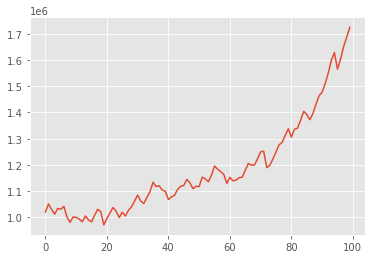

In [27]:



#df_new=df_new.reset_index()






from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import pandas as pd

# %matplotlib notebook
style.use('ggplot')
i = 75
trade = 0

capital = 1000000
lot_size = 1

pnl = 0
entry_date = 0
exit_date = 0
exit_time = 0
buy_price = 0
sell_price = 0

trade_log_dict = {"Entry_date": 0, "Entry_time": 0, "Exit_date": 0, "Exit_time": 0, "Buy_price": 0, "Sell_price": 0,"Pnl": 0, "Capital_Value": 0, "Stoploss": 0, "Reason": 0}

df_tradelog = pd.DataFrame(columns=["Entry_date", "Entry_time", "Exit_date", "Exit_time", "Buy_price", "Sell_price", "Pnl", "Capital_Value"
        , "Stoploss", "Reason"])

sc = 1000000
risk = 0.02
capital=1000000
no_of_shares = (risk * sc) / 100

tsl = 50
ns = []

enter = 0
a = 30000
#df = pd.read_csv('BNF_15_19_5min.csv')

df=df3


prevday_high = (df.loc[:, "high"][0:75]).max()
prevday_low = (df.loc[:, "low"][0:75]).min()
prevday_open = (df.loc[:, "open"][0])
prevday_close = (df.loc[:, "close"][74])

print(df.loc[:, "Date"][0], df.loc[:, "Date"][74], df.loc[:, "Date"][75])

first_5minhigh = 0
opening_candle_low = 0
potential_trade = 0

buy_price = 0
entry_time = 0
sl1 = 0
sl2 = 0
b = 300000

i = 75
while i < (len(df) - 100):
    #print(i)
    day = df.loc[:, "Date"][i]
    cdh = df.loc[:, "high"][i]
    cdl = df.loc[:, "low"][i]
    cdo = df.loc[:, "open"][i]

    # print(tsl)
    sl = prevday_high
    potential_trade =0
    enter=0

    pivot_point = (prevday_close + prevday_high + prevday_low) / 3

    r1 = (2*pivot_point) - prevday_low
    s1 = (2*pivot_point) - prevday_high
    r2 = (pivot_point) + (r1 - s1)
    
    s2=pivot_point-(prevday_high-prevday_low)
    # print(r1,r2)

    while day == df.loc[:, "Date"][i]:
        if df.loc[:, "high"][i] > cdh:
            cdh = df.loc[:, "high"][i]

        if df.loc[:, "low"][i] < cdl:
            cdl = df.loc[:, "low"][i]

        if (df.loc[:, "Time"][i] ==3 ) and ((int(df.loc[:, "close"][i]) > int(prevday_high)) or (int(df.loc[:, "open"][i]) > int(prevday_high))):
            first_5minhigh = int(df.loc[:, "high"][i])
            opening_candle_low = df.loc[:, "low"][i - 1]
            potential_trade = 1

        if (df.loc[:, "close"][i] > first_5minhigh) and (potential_trade == 1) and df.loc[:, "CO"][i] > 0.77 :
            buy_price = df.loc[:, "close"][i]
            entry_date = df.loc[:, "Date"][i]
            entry_time = df.loc[:, "Time"][i]
            potential_trade = 0
            sl1 = buy_price - prevday_high
            sl2 = buy_price - opening_candle_low
            enter = 1
            # i=i+1

            if sl1 < sl2:
                sl = sl1
            else:
                sl = sl2
            # print(sl)

        # (buy_price - df.loc[:, "close"][i] < sl and enter == 1)
        if ((df.loc[:, "Time"][i] == 73) and enter == 1):
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl = sell_price - buy_price

            no_of_shares = int((risk * capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "DayEnd"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            # print(no_of_shares)
            
        if ((buy_price - df.loc[:, "close"][i] > sl) and (enter == 1)):
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl = sell_price - buy_price

            no_of_shares = int((risk*capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "sl_hit"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            # print(no_of_shares)

        if df.loc[:, "close"][i] > (buy_price+100) and enter == 1:
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl = sell_price - buy_price

            no_of_shares = int((risk*capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "TargetR2"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            #print(no_of_shares)

        i=i+1

    prevday_open = cdo
    prevday_high = cdh
    prevday_low = cdl
    prevday_close = df.loc[:, "close"][i - 1]

# plt.show()

print(df_tradelog)
with_ml=df_tradelog['Capital_Value']
plt.plot(df_tradelog['Capital_Value'])
plt.show()
#df_tradelog.to_csv('dhs.csv')


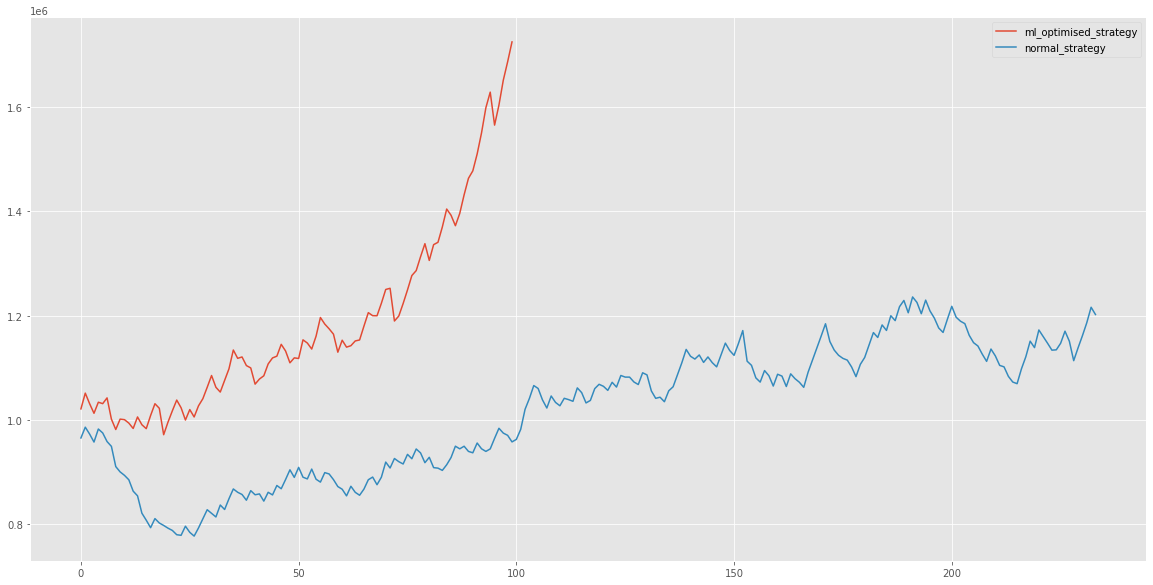

In [28]:
plt.figure(figsize=(20,10))



plt.plot(with_ml)
plt.plot(without_ml)
plt.legend(['ml_optimised_strategy','normal_strategy'])
plt.plot()
plt.show()

13-01-2015 14-01-2015 14-01-2015
     Entry_date Entry_time   Exit_date Exit_time  Buy_price  Sell_price  \
0    02-02-2015         11  02-02-2015        51   19635.20    19796.70   
1    04-02-2015          5  04-02-2015        27   19192.05    19304.80   
2    06-02-2015         10  06-02-2015        15   18902.35    18784.20   
3    09-02-2015          7  09-02-2015        42   18539.15    18634.80   
4    12-02-2015         29  12-02-2015        57   18783.25    18906.40   
..          ...        ...         ...       ...        ...         ...   
158  09-05-2019         54  09-05-2019        61   28835.15    28923.00   
159  13-05-2019         54  13-05-2019        57   28873.90    28918.10   
160  06-06-2019          7  06-06-2019        35   31409.35    31247.20   
161  13-06-2019          5  13-06-2019        22   30789.90    30665.95   
162  17-06-2019          7  17-06-2019        20   30461.90    30529.80   

        Pnl  Capital_Value  Stoploss    Reason  
0   -161.50      

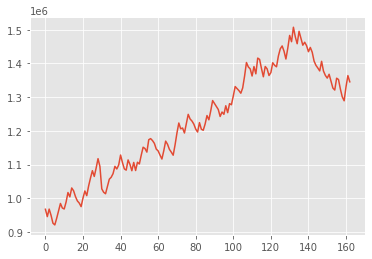

In [29]:



#df_new=df_new.reset_index()



#DLS


from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import pandas as pd

# %matplotlib notebook
style.use('ggplot')
i = 75
trade = 0

capital = 1000000
lot_size = 1

pnl = 0
entry_date = 0
exit_date = 0
exit_time = 0
buy_price = 0
sell_price = 0
first_5minlow=0

trade_log_dict = {"Entry_date": 0, "Entry_time": 0, "Exit_date": 0, "Exit_time": 0, "Buy_price": 0, "Sell_price": 0,"Pnl": 0, "Capital_Value": 0, "Stoploss": 0, "Reason": 0}

df_tradelog = pd.DataFrame(columns=["Entry_date", "Entry_time", "Exit_date", "Exit_time", "Buy_price", "Sell_price", "Pnl", "Capital_Value"
        , "Stoploss", "Reason"])

sc = 1000000
risk = 0.02
capital=1000000
no_of_shares = (risk * sc) / 100

tsl = 50
ns = []

enter = 0
a = 30000
#df = pd.read_csv('BNF_15_19_5min.csv')

df=df3


prevday_high = (df.loc[:, "high"][0:75]).max()
prevday_low = (df.loc[:, "low"][0:75]).min()
prevday_open = (df.loc[:, "open"][0])
prevday_close = (df.loc[:, "close"][74])

print(df.loc[:, "Date"][0], df.loc[:, "Date"][74], df.loc[:, "Date"][75])

first_5minhigh = 0
opening_candle_low = 0
potential_trade = 0

buy_price = 0
entry_time = 0
sl1 = 0
sl2 = 0
b = 300000

i = 75
while i < (len(df) - 100):
    #print(i)
    day = df.loc[:, "Date"][i]
    cdh = df.loc[:, "high"][i]
    cdl = df.loc[:, "low"][i]
    cdo = df.loc[:, "open"][i]

    # print(tsl)
    sl = prevday_high
    potential_trade =0
    enter=0

    pivot_point = (prevday_close + prevday_high + prevday_low) / 3

    r1 = (2*pivot_point) - prevday_low
    s1 = (2*pivot_point) - prevday_high
    r2 = (pivot_point) + (r1 - s1)
    
    s2=pivot_point-(prevday_high-prevday_low)
    # print(r1,r2)

    while day == df.loc[:, "Date"][i]:
        if df.loc[:, "high"][i] > cdh:
            cdh = df.loc[:, "high"][i]

        if df.loc[:, "low"][i] < cdl:
            cdl = df.loc[:, "low"][i]

        if (df.loc[:, "Time"][i] ==4 ) and ((int(df.loc[:, "close"][i]) < int(prevday_low)) or (int(df.loc[:, "open"][i]) < int(prevday_low))):
            first_5minlow = int(df.loc[:, "low"][i])
            opening_candle_high = df.loc[:, "high"][i - 1]
            potential_trade = 1

        if (df.loc[:, "close"][i] < first_5minlow) and (potential_trade == 1) and df.loc[:, "close"][i]<df.loc[:, "SMA_3"][i]: #and df.loc[:, "CO"][i] <-0.5: # :# and df.loc[:, "CO"][i] < -0.3: # and df.loc[:, "LO"][i] <-0.22 :
            buy_price = df.loc[:, "close"][i]
            entry_date = df.loc[:, "Date"][i]
            entry_time = df.loc[:, "Time"][i]
            potential_trade = 0
            sl1 =  prevday_low-buy_price 
            sl2 =  opening_candle_high-buy_price 
            enter = 1
            # i=i+1

            if sl1 < sl2:
                sl = sl1
            else:
                sl = sl2
            #print(sl)

        # (buy_price - df.loc[:, "close"][i] < sl and enter == 1)
        if ((df.loc[:, "Time"][i] == 73) and enter == 1):
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl = buy_price-sell_price

            no_of_shares = int((risk * capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "DayEnd"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            # print(no_of_shares)
            
        if (( df.loc[:, "close"][i]-buy_price  > sl) and (enter == 1)):
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl =  buy_price-sell_price 

            no_of_shares = int((risk*capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "sl_hit"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            # print(no_of_shares)

        if df.loc[:, "close"][i] < (buy_price-100) and enter == 1:
            enter = 0
            potential_trade = 0
            exit_date = df.loc[:, "Date"][i]
            exit_time = df.loc[:, "Time"][i]
            sell_price = df.loc[:, "close"][i]
            pnl =  buy_price-sell_price 

            no_of_shares = int((risk*capital) / 100)
            capital = capital + pnl*no_of_shares

            trade_log_dict = {"Entry_date": entry_date, "Entry_time": entry_time, "Exit_date": exit_date,
                              "Exit_time": exit_time, "Buy_price": buy_price, "Sell_price": sell_price, "Pnl": pnl,
                              "Capital_Value": capital, "Stoploss": sl, "Reason": "TargetR2"}
            df_tradelog = df_tradelog.append(trade_log_dict, ignore_index=True)
            #print(no_of_shares)

        i=i+1

    prevday_open = cdo
    prevday_high = cdh
    prevday_low = cdl
    prevday_close = df.loc[:, "close"][i - 1]

# plt.show()

print(df_tradelog)
with_ml=df_tradelog['Capital_Value']

plt.plot(df_tradelog['Capital_Value'])
plt.show()
#df_tradelog.to_csv('dhs.csv')
